# Python Iterators
> Iterator in Python is simply an object that can be iterated upon. List, tuple, string, etc are iterables.

> A Python iterator object must implement two special methods, <code>\_\_iter\_\_()</code> and <code>\_\_next\_\_()</code>, collectively called the <b><font color="red">iterator protocol</font></b>.

> We use the <code>next()</code> function to manually iterate through all the items of an iterator.

> The <code>iter()</code> function (which in turn calls the <code>\_\_iter\_\_()</code> method) returns an iterator from them.

In [2]:
# define a list
my_list = [4, 7, 0, 3]

# get iterator using iter()
my_iter = iter(my_list)

# iterate through it using next()
print(next(my_iter))
print(next(my_iter))

# next(obj) is same as obj.__next__()
print(my_iter.__next__())
print(my_iter.__next__())

print("")

# we can do the same with for loop:
my_list = [4, 7, 0, 3]

for element in my_list:
    print(element)

4
7
0
3

4
7
0
3


Let's see how for loop works with iterators inside:

In [6]:
iterable = [2,5,74,52,7,0]

# create an iterator object from that iterable
iter_obj = iter(iterable)

# infinite loop
while True:
    try:
        # get the next element
        element = next(iter_obj)
        # do something with element
        print(element)
    except StopIteration:
        # if StopIteration is raised, break from loop
        break

2
5
74
52
7
0


## Building Custom Iterators
> We just have to implement the <code>\_\_iter\_\_()</code> and the <code>\_\_next\_\_()</code> methods.

> The <code>\_\_iter\_\_()</code> method returns the iterator object itself. 
The <code>\_\_next\_\_()</code> method must return the next item in the sequence.

In [15]:
class PowTwo:
    """Class to implement an iterator
    of powers of two"""
    
    def __init__(self,max=0):
        self.max=max
        
    def __iter__(self):
        self.n=0
        return self
    
    def __next__(self):
        if self.n <= self.max:
            result = 2**self.n
            self.n += 1
            return result
        else:
            raise StopIteration
            
# create an object
numbers = PowTwo(5)

# create an iterable from the objeect
i = iter(numbers) # i = numbers.__iter__()

# Using next to get to the next iterator element
print(next(i))
print(next(i))
print(next(i))
print(i.__next__())
print(next(i))
print(next(i))
print(next(i)) # error StopIteration

1
2
4
8
16
32


StopIteration: 

## Python Infinite Iterators

>The built-in function <code>iter()</code> function can be called with two arguments where the first argument must be a callable object (function) and second is the sentinel. The iterator calls this function until the returned value is equal to the sentinel.

In [19]:
print(int()) # int() always returns 0

inf = iter(int, 1)
print(next(inf))
print(next(inf))
print(next(inf))

0
0
0
0


The following iterator will, theoretically, return all the odd numbers.

In [24]:
class InfIter:
    """Infinite iterator to return all
        odd numbers"""
    def __iter__(self):
        self.num = 1
        return self
    
    def __next__(self):
        num = self.num
        self.num += 2
        return num
    
a = iter(InfIter())

for x in range(10):
    print(next(a))

1
3
5
7
9
11
13
15
17
19


# Python Generators
Python generators are a simple way of creating iterators.

Simply speaking, a generator is a function that returns an object (iterator) which we can iterate over (one value at a time).

## Create generators in python
>If a function contains at least one <code>yield</code> statement (it may contain other <code>yield</code> or <code>return</code> statements), it becomes a generator function.

>The difference is that while a <code>return</code> statement terminates a function entirely, <code>yield</code> statement pauses the function saving all its states and later continues from there on successive calls.

>Methods like <code>\_\_iter\_\_()</code> and <code>\_\_next\_\_()</code> are implemented automatically. So we can iterate through the items using <code>next()</code>.

In [3]:
# A simple generator function
def myGen():
    n = 1 # Unlike normal functions, the local variables are not destroyed when the function yields.
    print("this is printed first")
    # Generator function contains yield statements
    yield n
    
    n+=1
    print('This is printed second')
    yield n
    
    n+=1
    print('This is printed last')
    yield n

a = myGen()

# We can iterate through the items using next().
print(next(a))

# Local variables and theirs states are remembered between successive calls.
print(next(a))
print(next(a))

# Finally, when the function terminates, StopIteration is raised automatically on further calls.
print(next(a))

this is printed first
1
This is printed second
2
This is printed last
3


StopIteration: 

In [4]:
# Using for loop
for item in myGen():
    print(item)

this is printed first
1
This is printed second
2
This is printed last
3


## Python Generators with a Loop


In [20]:
def rev_str(string):
    length = len(string)
    for i in range(length - 1, -1, -1):
        yield string[i]

# For loop to reverse the string
for char in rev_str("hello"):
    print(char)

o
l
l
e
h


## Python Generator Expression
>The syntax for generator expression is similar to that of a list comprehension in Python. But <font color="red">the square brackets are replaced with round parentheses</font>.

>A generator expression is much more memory efficient than an equivalent list comprehension.

In [24]:
# initialize the list
myList = [1,3,6,10]

# square each term using list comprehension
list_ = [x ** 2 for x in myList]

# same thing can be done using a generator expression
# generator expressions are surrounded by parenthesis ()
generator = (x ** 2 for x in myList)

print(list_) # [1, 9, 36, 100]
print(generator) # <generator object <genexpr> at 0x0000027FE6C45CF0> 
# it returned a generator object, which produces items only on demand.

print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))

# Generator expressions can be used as function arguments. 
# When used in such a way, the round parentheses can be dropped.
print(sum(x**2 for x in myList)) # OUTPUT: 146

[1, 9, 36, 100]
<generator object <genexpr> at 0x0000027FE6C45580>
1
9
36
100
146


In [26]:
def PowTwoGen(max=0):
    n = 0
    while n < max:
        yield 2 ** n
        n += 1
        
threee = PowTwoGen(7)
for x in threee:
    print(x)

1
2
4
8
16
32
64


## Pipelining Generators
Multiple generators can be used to pipeline a series of operations. This is best illustrated using an example.

In [27]:
def fibonacci_numbers(nums):
    x,y=0,1
    for uuh in range(nums):
        x,y=y,x+y
        yield x
        
def square(nums):
    for x in nums:
        yield x ** 2
        
print(sum(square(fibonacci_numbers(10))))

4895


# Python Closures
> A Closure is a function object that <font color="red">remembers values in enclosing scopes even if they are not present in memory</font>.

> Nested functions can access variables of the enclosing scope. In Python, these <font color='red'>non-local variables are read-only by default</font> and we must declare them explicitly as non-local (using <code>nonlocal</code> keyword) in order to modify them.

## Nested Function

In [1]:
def printMessage(msg):
    # This is the outer enclosing function
    
    def printer():
        # This is the nested function
        print(msg) # accessing msg from enclosing function
        
    printer()
    
printMessage("go")

go


## Defining a Closure Function

In [3]:
def printMessage(msg):
    # This is the outer enclosing function
    
    def printer():
        # This is the nested function
        print(msg) # accessing msg from enclosing function
        
    return printer # returns the nested function
    
function = printMessage("tomato")
function()

tomato


Even <font color='red'>though the execution of the "<code>printMessage()</code>" was completed, the message was rather preserved</font>. This technique by which the data is attached to some code even after end of those other original functions is called as <b><font color='red'>closures in python</font></b>.

### When do we have closures?
* We must have a nested function (function inside a function).
* The nested function must refer to a value defined in the enclosing function.
* The enclosing function must return the nested function.

In [9]:
def make_multip_of(n):
    def multiplier(x):
        return x * n
    return multiplier

times3 = make_multip_of(3)
times5 = make_multip_of(5)

print(times3(9))
print(times5(3))
print(times5(times3(4)))

27
15
60


# Python Decorators
> A decorator takes in a function, adds some functionality and returns it. 
> This is also called <b><font color="blue">metaprogramming</font></b> because a part of program tries to modify another part of program.

> Functions in python (as everything) are objects.

### Functions can be passed as arguments to another function.

In [15]:
def inc(x):
    return x + 1

def dec(x):
    return x - 1

def operate(func, x):
    result = func(x)
    return result

print(operate(inc, 5))
print(operate(dec, 5))

6
4


In [20]:
def make_pretty(func):
    def inner():
        print("I got decorated") #  the decorator function added some new functionality to the original function.
        func()
    return inner

def ordinary():
    print(" I am ordinary")
    
ordinary()
print()
pretty = make_pretty(ordinary) # we decorate function and reassign it
pretty()

 I am ordinary

I got decorated
 I am ordinary


We can use the <code>@</code> symbol along with the name of the decorator function and place it above the definition of the function to be decorated.

In [23]:
@make_pretty
def ordinary():
    print("I am ordinary")
    
# is eqivalent to:
def ordinary():
    print("I am ordinary")
ordinary = make_pretty(ordinary)
    
ordinary()

I got decorated
I am ordinary


## Decorating Functions with Parameters


In [30]:
# making a decorator that checks if we pass b as 0 ( so it will not show division by zero error )
def smart_divide(func):
    def inner(a,b):
        print("I am going to divide", a, "and", b)
        if b == 0:
            print("Whoops! cannot divide")
            return
        return func(a,b)
    return inner
    
@smart_divide
def divide(a,b):
    print(a/b)
    
divide(2,5)
divide(2,0)

I am going to divide 2 and 5
0.4
I am going to divide 2 and 0
Whoops! cannot divide


## general decorators that work with any number of parameters
<code>args</code> will be the tuple of positional arguments and <code>kwargs</code> will be the dictionary of keyword arguments.

In [31]:
def works_for_all(func):
    def inner(*args, **kwargs):
        print("I can decorate any function")
        return func(*args, ** kwargs)
    return inner

@works_for_all
def xxx(x,y,f):
    print(x * y / f)
    
xxx(23,5,74)

I can decorate any function
1.554054054054054


## Chaining Decorators in Python

In [33]:
def star(func):
    def inner(*args, **kwargs):
        print("*" * 30)
        func(*args, **kwargs)
        print("*" * 30)
    return inner

def cash(func):
    def inner(*args, **kwargs):
        print("$" * 30)
        func(*args, **kwargs)
        print("$" * 30)
    return inner

@star
@cash # is equivalent to printer = star(cash(printer))
def printer(msg):
    print(msg)
    
printer("Help my dick")

******************************
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Help my dick
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
******************************


# Python @property decorator
## Using Getters and Setters

In [4]:
class Celsius:
    def __init__(self, temperature=0):
        self.set_temperature(temperature)
        
    def to_fahrenheit(self):
        return (self.get_temperature() * 1.8) + 32
        
    # getter method
    def get_temperature(self):
        return self._temperature
    
    # setter method
    def set_temperature(self, value):
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible.")
        self._temperature = value
        
# Create a new object, set_temperature() internally called by __init__
human = Celsius(37)

# Get the temperature attribute via a getter
print(human.get_temperature())

# Get the to_fahrenheit method, get_temperature() called by the method itself
print(human.to_fahrenheit())

# new constraint implementation (set temperature to -300)
human.set_temperature(-300)

# Get the to_fahreheit method
print(human.to_fahrenheit())

37
98.60000000000001


ValueError: Temperature below -273.15 is not possible.

> An underscore <code>_</code> at the beginning is used to denote private variables in Python.
> The private variables don't actually exist in Python. There are simply norms to be followed. The language itself doesn't apply any restrictions.

## The property Class
A pythonic way to deal with the above problem is to use the <code>property</code> class.

In [9]:
# using property class
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature # This method has the line self.temperature = temperature. This expression automatically calls set_temperature().
        
    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32
    
    # getter
    def get_temperature(self):
        print("Getting value./././")
        return self._temperature
    
    # setter
    def set_temperature(self, value):
        print("Setting value./././")
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible")
        self._temperature = value
        
    # creating a property object
    temperature = property(get_temperature, set_temperature)
    
human = Celsius(37)

print()
print(human.temperature) # Similarly, any access like human.temperature automatically calls get_temperature().
print(human.to_fahrenheit())
print()

human.temperature = -301

Setting value./././

Getting value./././
37
Getting value./././
98.60000000000001

Setting value./././


ValueError: Temperature below -273.15 is not possible

## The @property Decorator
> <code>property()</code> is a built-in function that creates and returns a property object. 

SYNTAX -> <code>property(fget=None, fset=None, fdel=None, doc=None)</code>
* <code>fget</code> is function to get value of the attribute <code>getter()</code>
* <code>fset</code> is function to set value of the attribute <code>setter()</code>
* <code>fdel</code> is function to delete the attribute <code>deleter()</code>
* <code>doc</code> is a string (like a comment)

<code>temperature = property(get_temperature,set_temperature)</code>

can be broken down as:

<code>
    # make empty property
    temperature = property()
    # assign fget
    temperature = temperature.getter(get_temperature)
    # assign fset
    temperature = temperature.setter(set_temperature
 </code>

In [12]:
# Using @property decorator
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32
    
    @property
    def temperature(self):
        print("Getting value...")
        return self._temperature
    
    @temperature.setter
    def temperature(self,value):
        print("Setting value...")
        if value < -273.15:
            raise ValueError("Temperature below -273 is not possible")
        self._temperature = value
        
# create an object
human = Celsius(37)

print(human.temperature)

print(human.to_fahrenheit())

coldest_thing = Celsius(-300)

Setting value...
Getting value...
37
Getting value...
98.60000000000001
Setting value...


ValueError: Temperature below -273 is not possible

# Python RegEx
https://www.programiz.com/python-programming/regex

> A Regular Expression (RegEx) is a sequence of characters that defines a search pattern. For example,

> Python has a module named <code>re</code> to work with RegEx.

In [14]:
import re

pattern = "^a...s$"
test_string="abyss"
result = re.match(pattern, test_string)

if result:
    print("Search successful.")
else:
    print("Search unsuccessful.")

Search successful.


## MetaCharacters

### > <code> [] . ^ $ * + ? {} () \ |</code>


> * <code>[]</code> - Square brackets -> specifies a set of characters you wish to match. <code>[abc]</code> will match if the string you are trying to match contains any of the <code>a<code></code> b</code> or <code>c</code>.

> * <code>.</code> - Period -> matches any single character. <code>[..]</code> will match if the string you are trying to match contains at least 2 characters.

> 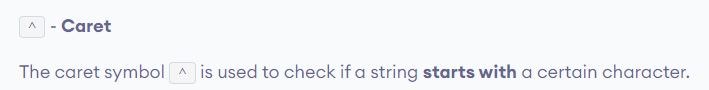

> 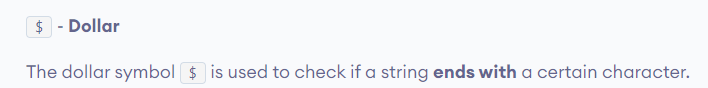

> 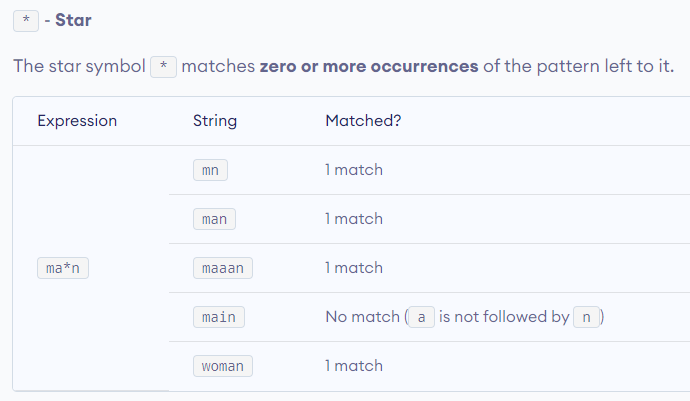

> 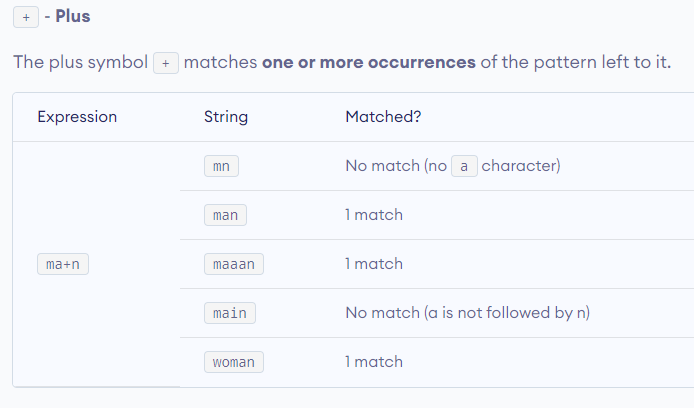

> 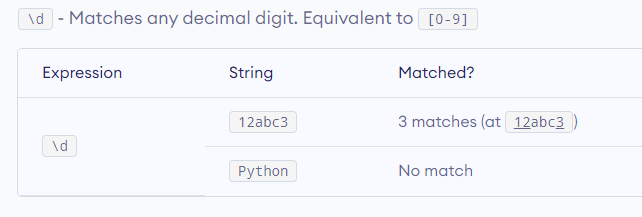

### re.findall()
The <code>re.findall()</code> method returns a list of strings containing all matches.

In [15]:
# Program to extract numbers from a string

import re

string = 'hello 12 hi 89. Howdy 34'
pattern = '\d+'

result = re.findall(pattern, string)
print(result)

['12', '89', '34']


### re.split()
The <code>re.split</code> method splits the string where there is a match and returns a list of strings where the splits have occurred.

In [16]:
import re

string = 'Twelve:12 Eighty nine:89.'
pattern = '\d+'

result = re.split(pattern, string)
print(result)

['Twelve:', ' Eighty nine:', '.']


### re.sub()
<code>re.sub(pattern, replace, string)</code>


> The method returns a string where matched occurrences are replaced with the content of replace variable.

In [17]:
# Program to remove all whitespaces
import re

# multiline string
string = 'abc 12\
de 23 \n f45 6'

# matches all whitespace characters
pattern = '\s+'

# empty string
replace = ''

new_string = re.sub(pattern, replace, string)
print(new_string)

abc12de23f456
